# Translated Metadata

SOURCE: ROYAL NETHERLANDS METEOROLOGICAL INSTITUTE (KNMI)
Comment: These time series are inhomogeneous because of station relocations and changes in observation techniques. As a result, these series are not suitable for trend analysis. For climate change studies we refer to the homogenized series of daily data <http://www.knmi.nl/nederland-nu/klimatologie/daggegevens> or the Central Netherlands Temperature <http://www.knmi.nl/kennis-en-datacentrum/achtergrond/centraal-nederland-temperatuur-cnt>.

YYYYMMDD = date (YYYY=year, MM=month, DD=day) / date (YYYY=year, MM=month, DD=day)

HH = time (HH=hour, UT. 12 UT=13 CET, 14 CEST. Hourly division 05 runs from 04:00 UT to 05:00 UT) / time (HH hr/hour, UT. 12 UT=13 CET, 14 CEST. 
Hourly division 05 runs from 04:00 UT to 05:00 UT)

DD = Wind direction (in degrees) averaged over the last 10 minutes of the previous hour (360=north, 90=east, 180=south, 270=west, 0=calm, 990=variable) / Mean wind direction (in degrees) for the 10-minute period preceding the observation time stamp (360=north, 90=east, 180=south, 270=west, 0=calm, 990=variable)

FH = Wind speed (in 0.1 m/s) averaged over the past hour / Mean wind speed (in 0.1 m/s) for the hour preceding the observation time stamp

FF = Wind speed (in 0.1 m/s) averaged over the last 10 minutes of the past hour / Mean wind speed (in 0.1 m/s) for the 10-minute period preceding the observation time stamp

FX = Highest wind gust (3-second average wind speed; in 0.1 m/s) measured in the past hour / Maximum wind gust (3-second mean wind speed; in 0.1 m/s) in the preceding hour

T = Temperature (in 0.1 degrees Celsius) at 1.50 m height during the observation / Temperature (in 0.1 degrees Celsius) at 1.50 m at the time of observation

T10N = Minimum temperature (in 0.1 degrees Celsius) at 10 cm altitude in the past 6 hours / Minimum temperature (in 0.1 degrees Celsius) at 0.1 m in the preceding 6-hour period

TD = Dew point temperature (in 0.1 degrees Celsius) at 1.50 m altitude during the observation / Dew point temperature (in 0.1 degrees Celsius) at 1.50 m at the time of observation

SQ = Sunshine duration (in 0.1 hours) per hourly period, calculated from global radiation (-1 for <0.05 hours) / Sunshine duration (in 0.1 hours) during the hourly division, calculated from global radiation (-1 for <0.05 hours)

Q = Global radiation (in J/cm²) per hourly period / Global radiation (in J/cm²) during the hourly division

DR = Precipitation duration (in 0.1 hours) per hourly period / Precipitation duration (in 0.1 hours) during the hourly division

RH = Hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm) / Hourly precipitation amount (in 0.1 mm) (-1 for <0.05 mm)

P = Air pressure (in 0.1 hPa) reduced to mean sea level, at the time of observation

VV = Horizontal visibility during observation (0=less than 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km, ..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=more than 70km) / Horizontal visibility at the time of observation (0=less than 100m, 1=100-200m, 2=200-300m,..., 49=4900-5000m, 50=5-6km, 56=6-7km, 57=7-8km, ..., 79=29-30km, 80=30-35km, 81=35-40km,..., 89=more than 70km)

N = Cloud cover (upper air coverage in eighths) during the observation (9=upper air invisible) / Cloud cover (in octants) at the time of observation (9=sky invisible)

U = Relative humidity (in percent) at 1.50m altitude during the observation / Relative atmospheric humidity (in percent) at 1.50m at the time of observation

WW = Weather code (00-99), visual (WW) or automatic (WaWa)

In [2]:
import pandas as pd


In [3]:
file_path = "data/uurgeg_240_2021-2030.txt"
df = pd.read_csv(file_path)

def clean_KNMI_dataset(df):
    # Strip spaces from all column names
    df.columns = df.columns.str.strip()
    df['HH_fixed'] = df['HH'].replace(24, 0)
    df['datetime'] = pd.to_datetime(
        df['YYYYMMDD'].astype(str) + df['HH_fixed'].astype(str).str.zfill(2),
        format='%Y%m%d%H'
    )
    df.loc[df['HH'] == 24, 'datetime'] += pd.Timedelta(days=1)
    df = df.sort_values('datetime').reset_index(drop=True)
    df['temperature'] = df['T'] / 10        # Temperature (°C)
    df['dew_point'] = df['TD'] / 10      # Dew point (°C)
    df['air_pressure'] = df['P'] / 10      # Air pressure (hPa)
    df['wind_speed'] = df['FF'] / 10     # Wind speed (m/s)
    df['max_gust'] = df['FX'] / 10     # Max gust (m/s)
    df['rainfall'] = df['RH'] / 10     # Rainfall (mm)
    df['sunshine_duration'] = df['SQ'] / 10      # Sunshine duration (hours)
    df['relative_humidity'] = df['U']   # relative humidity in percent

    df.set_index('datetime', inplace=True)
    start_date = '2025-08-20'
    end_date   = '2025-08-24'
    filtered_df = df.loc[start_date:end_date]

    # Keep only the useful columns
    keep_cols = ['temperature', 'dew_point', 'air_pressure', 'wind_speed', 'max_gust','rainfall','sunshine_duration','relative_humidity']
    df_clean = filtered_df[keep_cols].copy()



    return df_clean

df = clean_KNMI_dataset(df)
df.head()

/var/folders/r7/j4cx6h396gqdzk5s_4h9vf180000gn/T/ipykernel_38303/3228901485.py:2: DtypeWarning: Columns (16,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,temperature,dew_point,air_pressure,wind_speed,max_gust,rainfall,sunshine_duration,relative_humidity
datetime,,,,,,,,
2025-08-20 00:00:00,16.8,12.5,1014.6,4.0,7.0,0.0,0.0,75
2025-08-20 01:00:00,17.1,12.7,1014.5,3.0,6.0,0.0,0.0,75
2025-08-20 02:00:00,17.3,12.9,1014.3,4.0,5.0,0.0,0.0,75
2025-08-20 03:00:00,17.0,12.6,1014.2,4.0,7.0,0.0,0.0,74
2025-08-20 04:00:00,16.8,11.3,1014.1,4.0,7.0,0.0,0.0,70


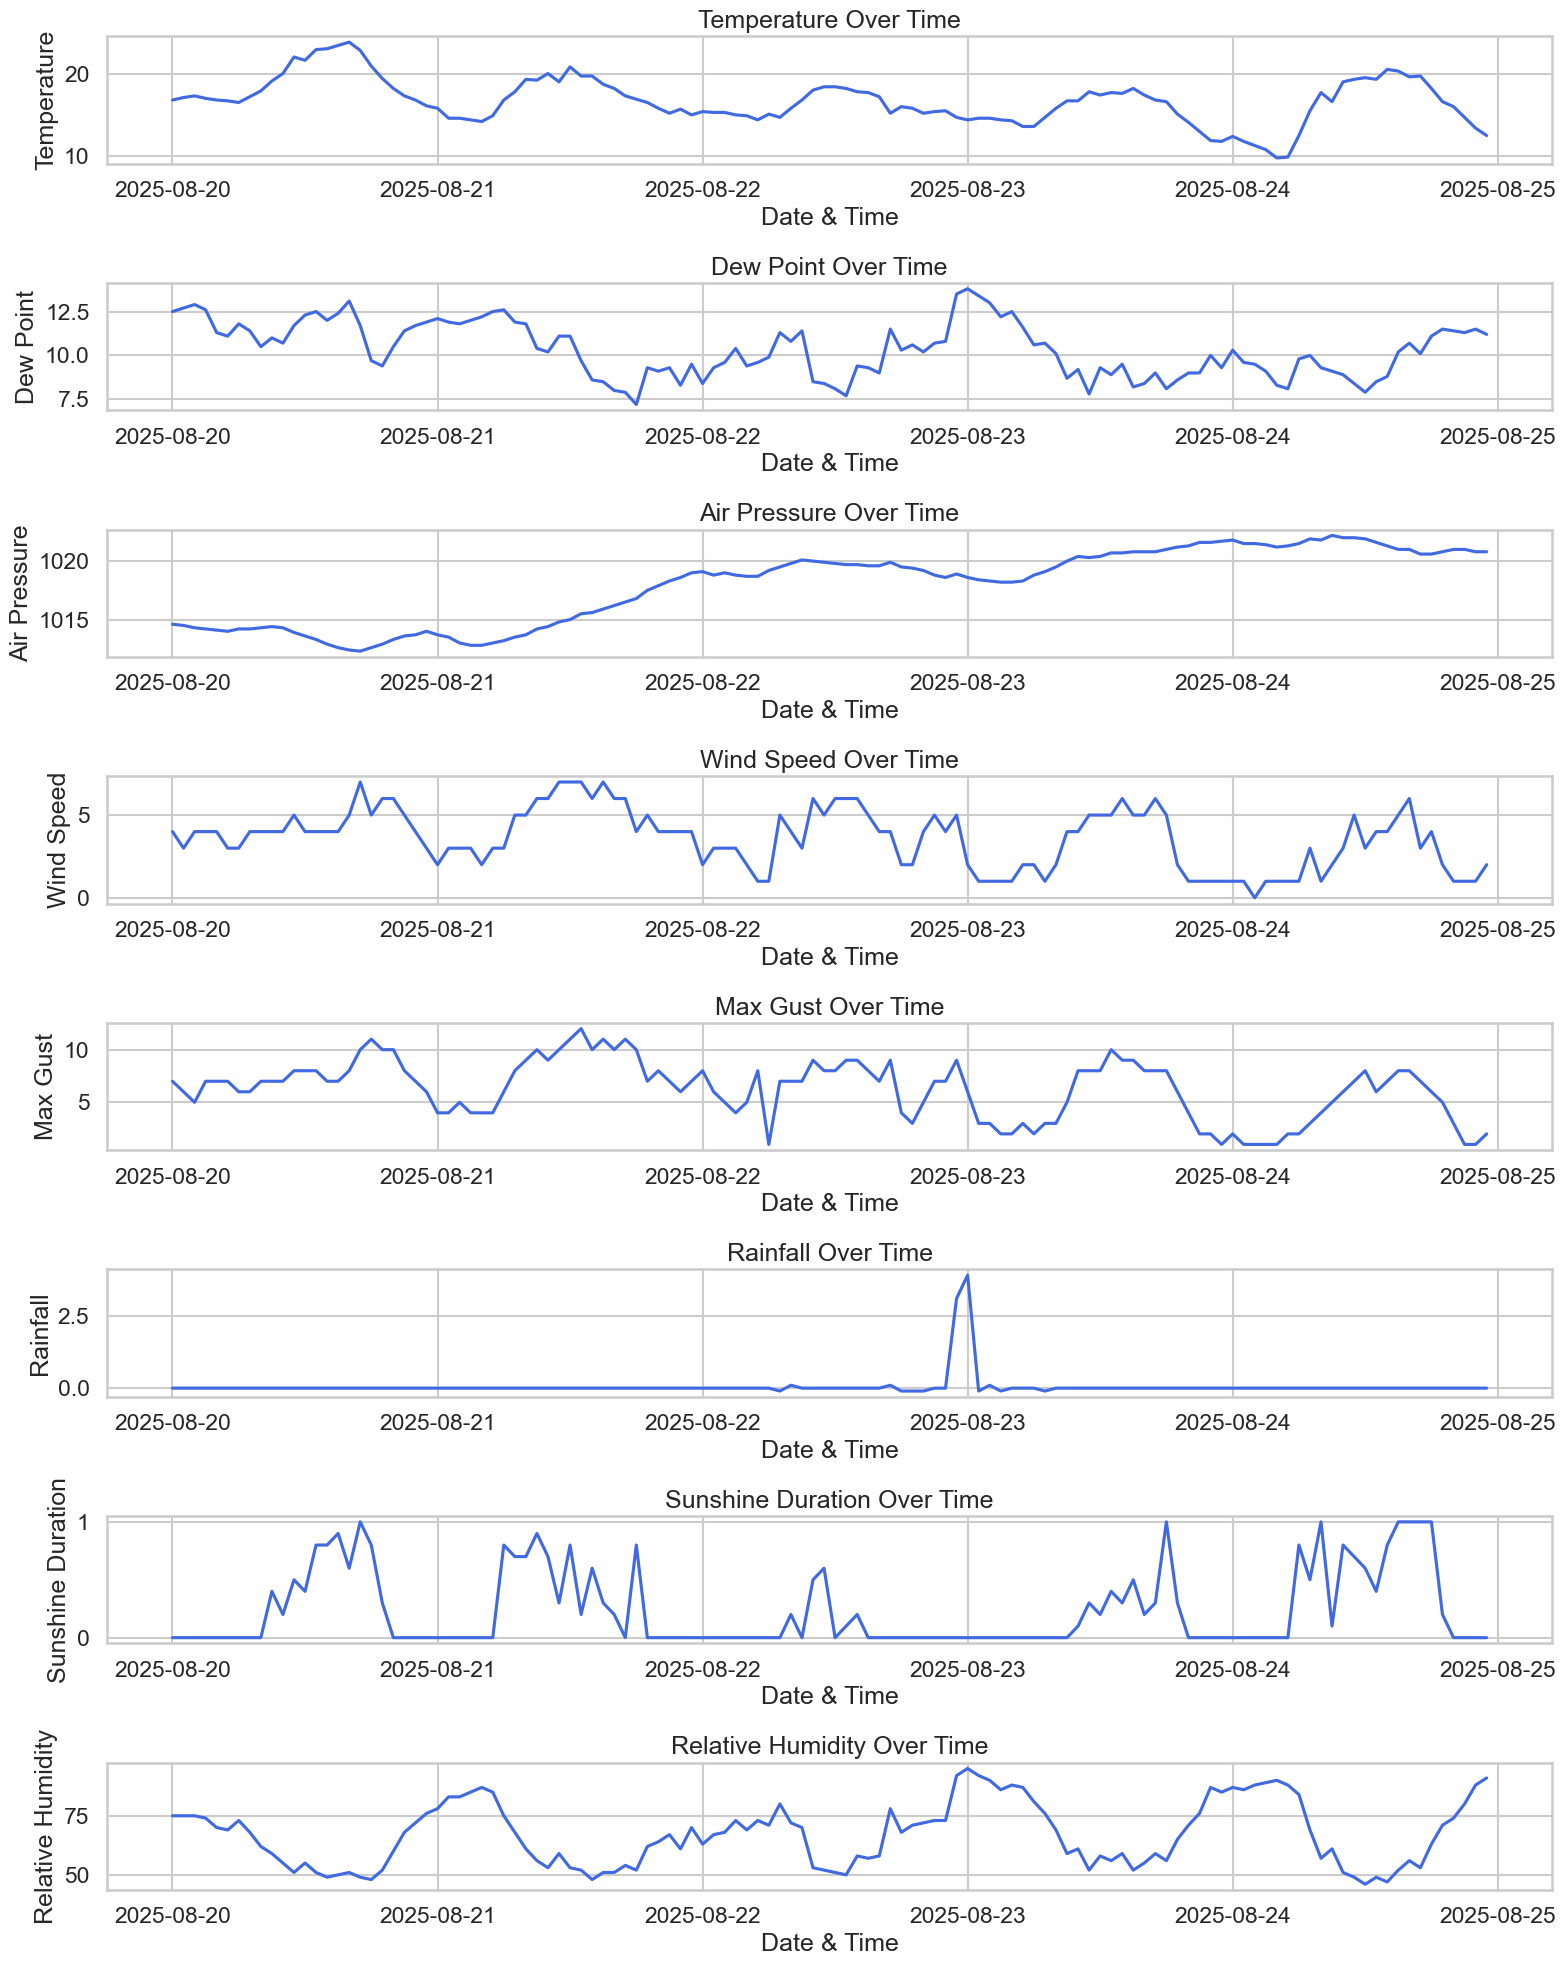

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
sns.set_theme(style="whitegrid", context="talk")

# --- Plot time series for all weather variables ---
plt.figure(figsize=(16, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 1, i)
    sns.lineplot(data=df, x=df.index, y=col, color='royalblue')
    plt.title(f"{col.replace('_', ' ').title()} Over Time")
    plt.xlabel("Date & Time")
    plt.ylabel(col.replace('_', ' ').title())
    plt.tight_layout()

plt.show()


In [5]:
df.to_csv(
    '/Users/sheikharfahmi/Desktop/TIL_Python_Programming/SAIL2025---Group20/data/weather_data_cleaned.csv'
)
